In [2]:
import os
from pathlib import Path

import arviz as az
import numpy as np
import pydot

/home/max/.pyenv/versions/3.11.6/envs/mlda/lib/python3.11/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(


<Axes: xlabel='x\n0', ylabel='x\n1'>

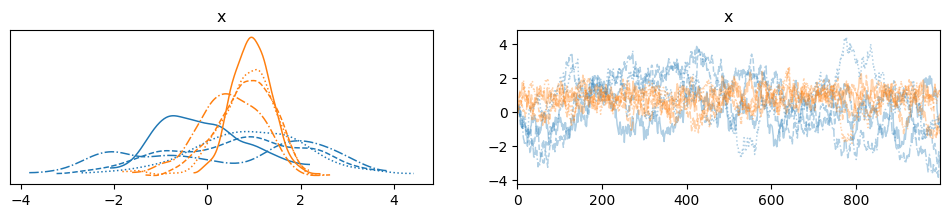

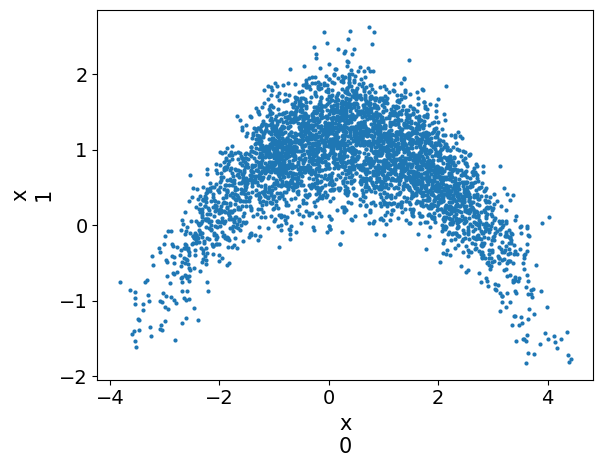

In [3]:
result_dir = Path("../results")
npy_files = [file for file in os.listdir(result_dir)
             if (os.path.isfile(result_dir / Path(file)) and file.endswith("npy"))]
chains = np.array([np.load(result_dir / Path(file)) for file in npy_files])
chain_names = [Path(file).stem for file in npy_files]
dataset = az.convert_to_dataset(chains)
az.plot_trace(dataset)
az.plot_pair(dataset)

In [3]:
result_dir = Path("../results/mltree")
dot_files = [result_dir/ Path(file) for file in os.listdir(result_dir)
             if (os.path.isfile(result_dir / Path(file)) and file.endswith("dot"))]

for file in dot_files:
    graph = pydot.graph_from_dot_file(file)[0]
    graph.write_png(file.with_suffix(".png"))